# User Overview 1.1

## Data Understanding and Cleaning

In [1]:
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)


missing_values = ["n/a", "na", "undefined", "?", None]
db = pd.read_csv("../data/data.csv")
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


#### Handling Missing Values

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
percent_missing(db)

The Telecom Financial dataset contains 12.5 % missing values.


In [6]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# drop columns with more than 30% missing values
df_clean = db.drop(['Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B'], axis=1)
df_clean.shape

(150001, 50)

In [8]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)


df_clean['HTTP DL (Bytes)'] = fix_missing_ffill(df_clean, 'HTTP DL (Bytes)')
df_clean['HTTP UL (Bytes)'] = fix_missing_ffill(df_clean, 'HTTP UL (Bytes)')
df_clean['Avg RTT DL (ms)'] = fix_missing_ffill(df_clean, 'Avg RTT DL (ms)')
df_clean['Avg RTT DL (ms)'] = fix_missing_ffill(df_clean, 'Avg RTT DL (ms)')
df_clean['TCP DL Retrans. Vol (Bytes)'] = fix_missing_ffill(df_clean, 'TCP DL Retrans. Vol (Bytes)')
df_clean['TCP UL Retrans. Vol (Bytes)'] = fix_missing_ffill(df_clean, 'TCP UL Retrans. Vol (Bytes)')




In [9]:
percent_missing(df_clean)

The Telecom Financial dataset contains 1.73 % missing values.


#### The missing data percent has decreased from 12% to 1.84%

# Data Exploration

## Data Filtering

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'The top 10 handset used by customers'}, ylabel='Handset Type'>

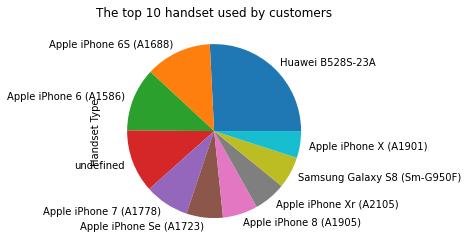

In [10]:
all = df_clean['Handset Type'].value_counts().head(10)
print(all)
all.plot(kind="pie", title="The top 10 handset used by customers")

## The top 10 handset used by customers

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


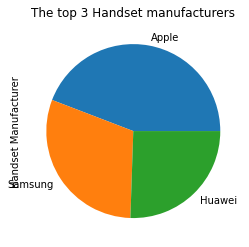

In [11]:
# replace undefined with mode
mode= df_clean['Handset Manufacturer'].mode()
df_clean['Handset Manufacturer'].fillna(mode,inplace=True)
x = df_clean['Handset Manufacturer'].value_counts().head(3)
print(x)
x.plot(kind="pie", title="The top 3 Handset manufacturers");

## The top 3 Handset manufacturers

Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':' top 5 Huawei handset'}, ylabel='Handset Type'>

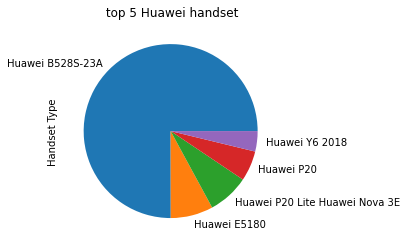

In [12]:
top3 = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Huawei'].head(5)
print(top3)
top3.plot(kind="pie" , title=" top 5 Huawei handset")


Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'top 5 Apple handset'}, ylabel='Handset Type'>

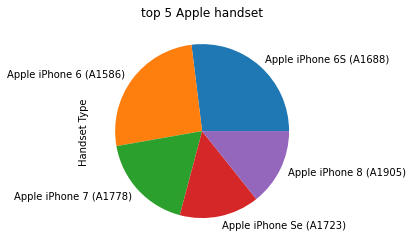

In [13]:
apple = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Apple'].head()
print(apple)
apple.plot(kind="pie",  title = 'top 5 Apple handset')

Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'top 5 Samsung handset'}, ylabel='Handset Type'>

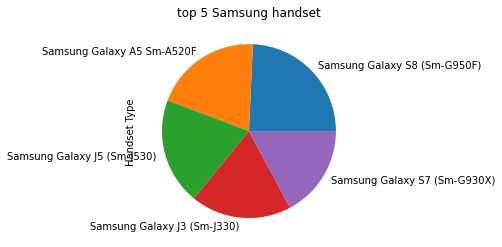

In [14]:
samsung = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Samsung'].head()
print(samsung)
samsung.plot(kind="pie", title = 'top 5 Samsung handset')

#### The above results are the top 5 handset per top 3 handset manufacturers

In [15]:
sessionsCountData=df_clean['MSISDN/Number'].value_counts().head()

sessionsCount=sessionsCountData.values.tolist()

msisdn=sessionsCountData.index.values

sessionPerUserDictionary = dict(zip(msisdn, sessionsCount))

print(sessionPerUserDictionary)

{33626320676.0: 18, 33614892860.0: 17, 33625779332.0: 17, 33659725664.0: 16, 33760536639.0: 15}


#### The above results show the session frequency, how may times each user connected. 

In [16]:
df_clean.groupby('MSISDN/Number')['Dur. (ms)'].sum()

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

#### The above results show the sum of session duration of each user in microseconds

In [17]:
df_clean = df_clean.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL'})
sum_column = df_clean["totalUL"] + df_clean["totalDL"]
df_clean["totalData"] = sum_column
totalDataDF=df_clean.groupby('MSISDN/Number')['totalData'].sum()
totalDataValues = totalDataDF.values
msisdn=totalDataDF.index.values

dataPerUser = dict(zip(msisdn, totalDataValues))

dict_items = dataPerUser.items()
first_twenty = list(dict_items)[:20]
first_twenty

[(33601001722.0, 878690574.0),
 (33601001754.0, 156859643.0),
 (33601002511.0, 595966483.0),
 (33601007832.0, 422320698.0),
 (33601008617.0, 1457410944.0),
 (33601010682.0, 615217221.0),
 (33601011634.0, 654723066.0),
 (33601011959.0, 332660357.0),
 (33601014694.0, 990132189.0),
 (33601020306.0, 732463761.0),
 (33601021045.0, 114976036.0),
 (33601021217.0, 630092434.0),
 (33601022743.0, 482419082.0),
 (33601024291.0, 358911900.0),
 (33601025738.0, 230324396.0),
 (33601026147.0, 541779966.0),
 (33601027208.0, 697559667.0),
 (33601031129.0, 637053075.0),
 (33601032846.0, 718452416.0),
 (33601032987.0, 647203715.0)]

#### The above results shows total DL and UL data per user

In [18]:
df_clean=df_clean.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})

sum_column = df_clean["totalUL"] + df_clean["totalDL"]


google = df_clean['Google DL (Bytes)']+ df_clean['Google UL (Bytes)']
email = df_clean['Email DL (Bytes)']+ df_clean['Email UL (Bytes)']
gaming = df_clean['Gaming DL (Bytes)']+ df_clean['Gaming UL (Bytes)']
youtube = df_clean['Youtube DL (Bytes)']+ df_clean['Youtube UL (Bytes)']
netflix = df_clean['Netflix DL (Bytes)']+ df_clean['Netflix UL (Bytes)']
social = df_clean['Social Media DL (Bytes)']+ df_clean['Social Media UL (Bytes)']

df_clean['google']=google
df_clean['email']=email
df_clean['gaming']=gaming
df_clean['youtube']=youtube
df_clean['netflix']=netflix
df_clean['social']=social

relevant_data=df_clean[['msisdn', 'google','email','gaming','youtube','netflix','social']]
relevant_data["totalData"] = sum_column
relevant_data.groupby('msisdn')['totalData'].sum()

msisdn
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: totalData, Length: 106856, dtype: float64

In [19]:
df_clean.to_csv("../data/datax.csv", index=False)

#### The above results show the aggregate data used by each customer on many different sessions